In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)


##### ===========================================================================================================

#### Task 1

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
boston_df.drop(columns = ['Unnamed: 0'],inplace=True)

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


##### ===========================================================================================================

#### Task 2

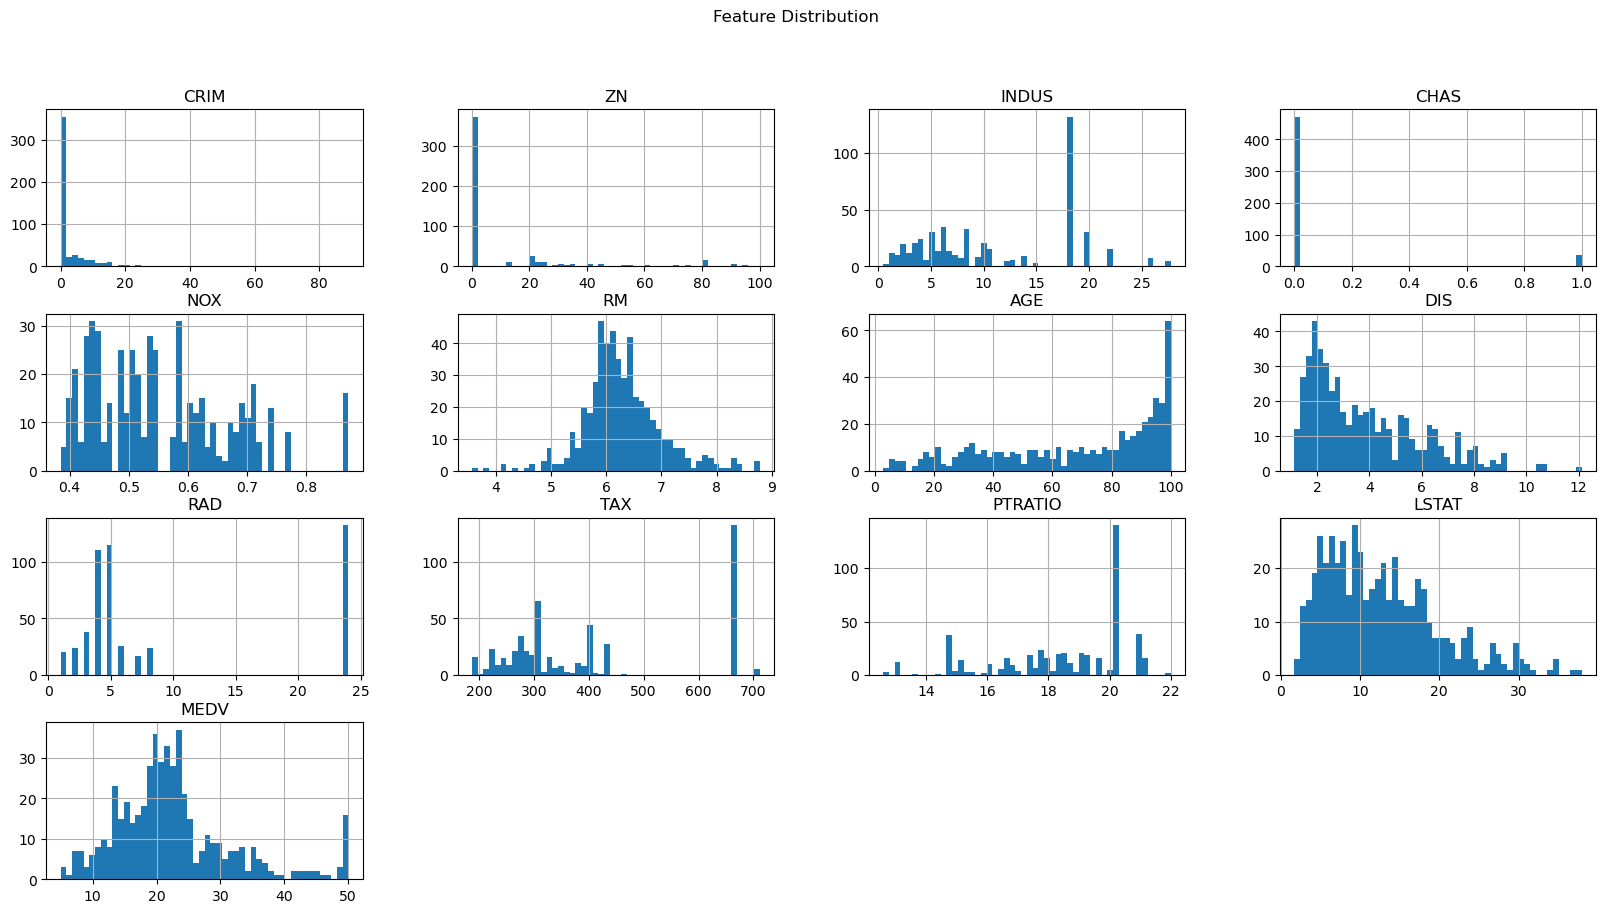

In [8]:
boston_df.hist(bins = 50, figsize = (20,10))
plt.suptitle('Feature Distribution', ha = 'center', fontsize = 'large')
# plt.grid(True, linestyle=':', color='lightgray', alpha=0.5)
plt.show()

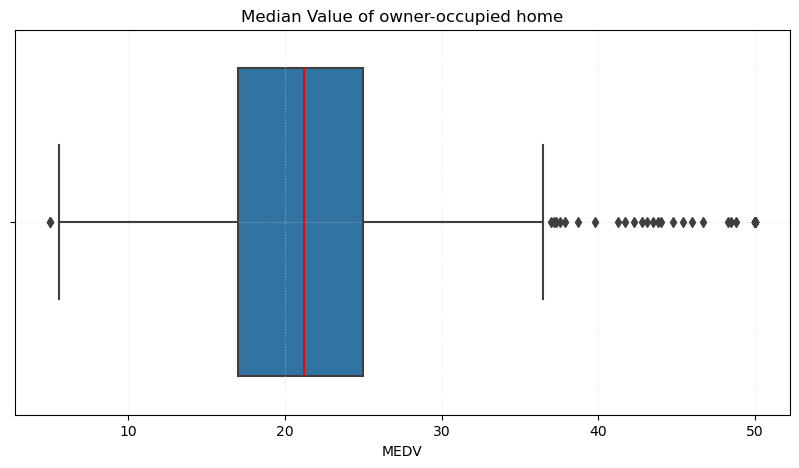

In [9]:
plt.figure(figsize = (10,5))
sns.boxplot(x = boston_df.MEDV, medianprops = {'color': 'red'})
plt.title("Median Value of owner-occupied home")
plt.grid(True, linestyle = ':', color = 'lightgray', alpha = 0.5)
plt.show()

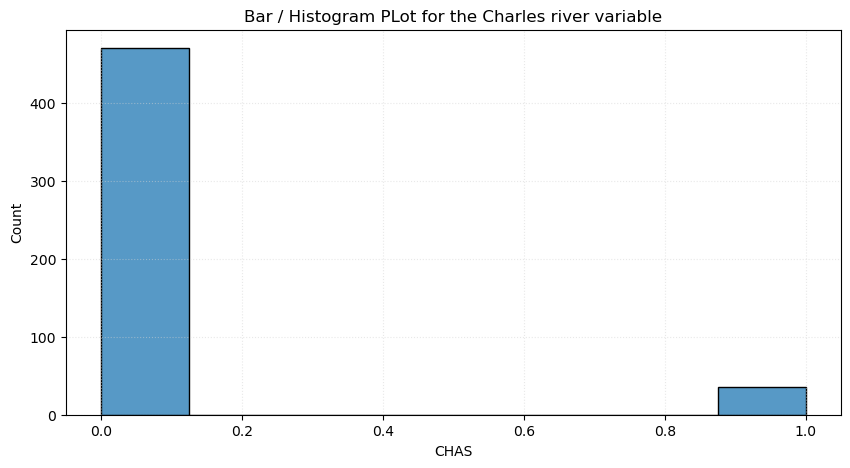

In [10]:
plt.figure(figsize = (10,5))
sns.histplot(data = boston_df.CHAS, bins = 8)
plt.title("Bar / Histogram PLot for the Charles river variable")
plt.grid(True, linestyle = ':', color = 'lightgray', alpha = 0.5)
plt.show()

In [11]:
conditions = [(boston_df["AGE"] <= 35), (boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), (boston_df["AGE"] >= 70) ]
choices = [ '35 years and younger', 'between 35 and 70 years', '70 years and older' ]
boston_df['Age_Group'] = np.select(conditions, choices, default = 'Unknown')

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


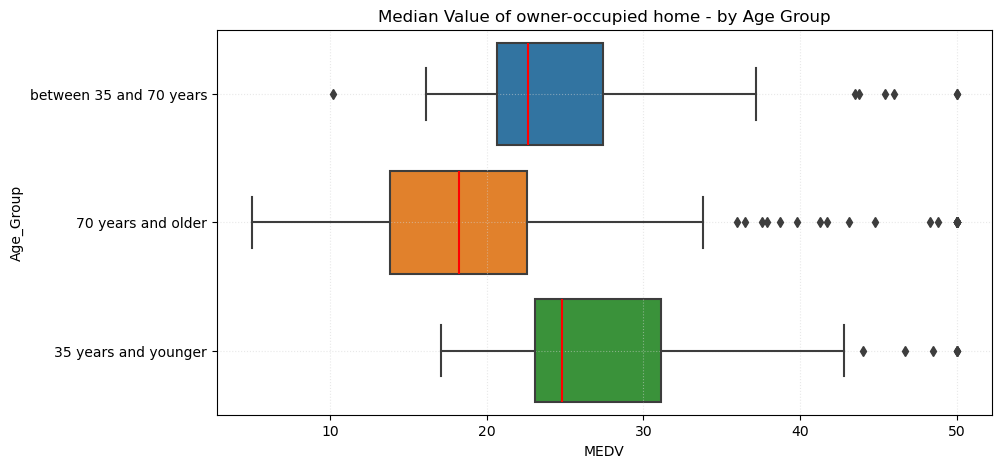

In [13]:
plt.figure(figsize = (10,5))
sns.boxplot(x = boston_df.MEDV, y = boston_df.Age_Group, data = boston_df, medianprops = {'color': 'red'})
plt.title("Median Value of owner-occupied home - by Age Group")
plt.grid(True, linestyle = ':', color = 'lightgray', alpha = 0.5)
plt.show()

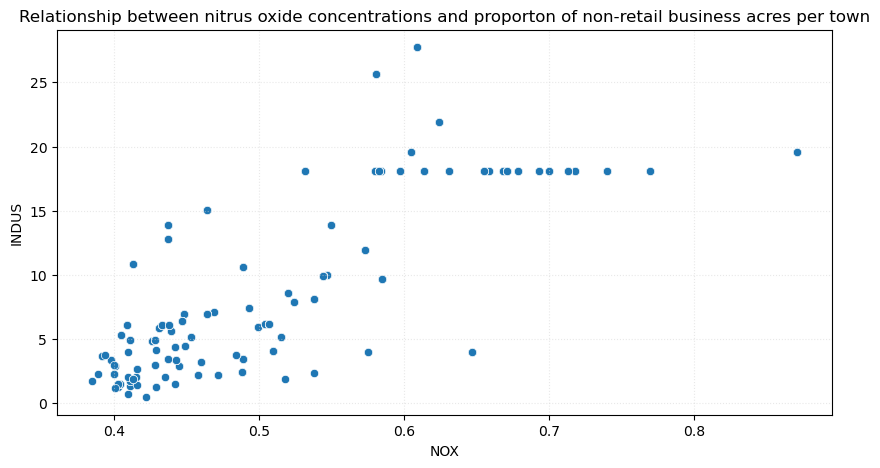

In [14]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = boston_df.NOX, y = boston_df.INDUS, data = boston_df)
plt.title("Relationship between nitrus oxide concentrations and proporton of non-retail business acres per town")
plt.grid(True, linestyle = ':', color = 'lightgray', alpha = 0.5)
plt.show()

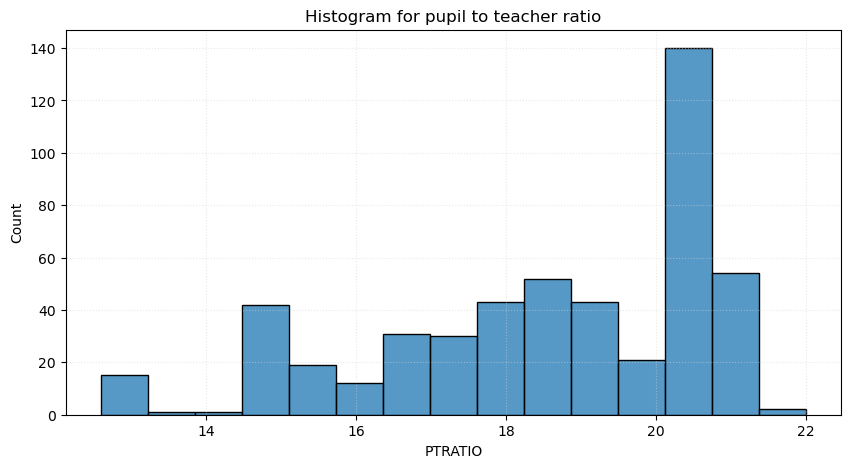

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data = boston_df.PTRATIO, bins = 15)
plt.title("Histogram for pupil to teacher ratio")
plt.grid(True, linestyle = ':', color = 'lightgray', alpha = 0.5)
plt.show()

##### ===========================================================================================================

#### Task 3

##### T-test for independent samples
##### Is there a significant difference in median value of houses bounded by the Charles river or not?
######
###### Null Hypothesis         : Both average MEDV are the same
###### Alternative Hypothesis  : Both average MEDV are NOT the same

In [16]:
boston_df['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [17]:
y = boston_df[boston_df["CHAS"] == 1]["MEDV"]
n = boston_df[boston_df["CHAS"] == 0]["MEDV"]

In [18]:
# y
# n

In [19]:
t_statistic, p_value = st.ttest_ind(y, n)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis! Both average MEDV are NOT the same. There is statistical significance!")
else:
    print("Fail to reject the null hypothesis! Both average MEDV are the same. There is NO statistical significance!")


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis! Both average MEDV are NOT the same. There is statistical significance!


###### ===========================================================================================================
######
##### ANOVA
######
###### Null Hypothesis         : There is no difference in Median values of houses, MEDV, proportionate to AGE
###### Alternative Hypothesis  : There is difference in at least one of Median values of houses, MEDV, proportionate to AGE

In [20]:
boston_df["AGE"].value_counts()

AGE
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: count, Length: 356, dtype: int64

In [22]:
low = boston_df[boston_df["Age_Group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["Age_Group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["Age_Group"] == '70 years and older']["MEDV"]

In [23]:
f_statistic, p_value = st.f_oneway(low, mid, high)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis! There is a statistically significant difference between at least one pair of the groups.")
else:
    print("Fail to reject the null hypothesis! There is no statistically significant difference between the groups.")


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a statistically significant difference between at least one pair of the groups.


###### ===========================================================================================================
######
##### Pearson Correlation
######
###### Null Hypothesis         : There is no relation b/w Nitrus oxide concentrations and proportion of non-retail business acres per town
###### Alternative Hypothesis  : There is relation b/w Nitrus oxide concentrations and proportion of non-retail business acres per town

In [25]:
pearson,p_value = st.pearsonr(boston_df["NOX"],boston_df["INDUS"])

print("Pearson Co-efficient:", pearson)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis! There is relation b/w Nitrus oxide concentrations and proportion of non-retail business acres per town")
else:
    print("Fail to reject the null hypothesis! There is no relation b/w Nitrus oxide concentrations and proportion of non-retail business acres per town.")

Pearson Co-efficient: 0.763651446920915
P-value: 7.913361061241167e-98
Reject the null hypothesis! There is relation b/w Nitrus oxide concentrations and proportion of non-retail business acres per town


###### ===========================================================================================================
######
##### Regression Analysis
######
###### Null Hypothesis         : There is no relation b/w weighted distances to five Boston employment centres and MEDV
###### Alternative Hypothesis  : There is relation b/w weighted distances to five Boston employment centres and MEDV

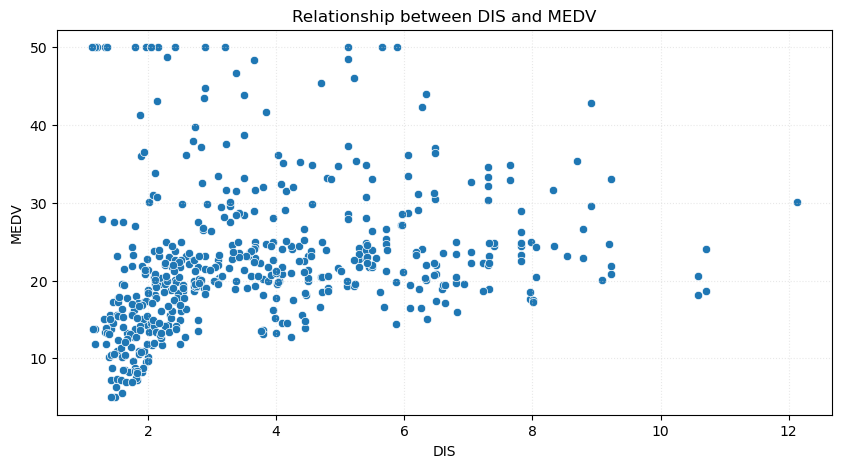

In [35]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = boston_df.DIS, y = boston_df.MEDV, data = boston_df)
plt.title("Relationship between DIS and MEDV")
plt.grid(True, linestyle = ':', color = 'lightgray', alpha = 0.5)
plt.show()

In [26]:
y = boston_df['MEDV']
x = boston_df['DIS']

In [27]:
model = sm.OLS(y,x).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):                   1.52e-146
Time:                        17:28:42   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Centered around the mean by including a constant term in the model 

In [31]:
X = sm.add_constant(x)
result = sm.OLS(y, X).fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        17:32:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
pearson = np.sqrt(0.062)

print("Pearson Co-efficient:", pearson)

Pearson Co-efficient: 0.24899799195977465


##### Low Pearson Co-efficient is suggestive of a weak relationship b/w DIS & MEDV